PROBLEM STATEMENT:
Build CNN Model for Classification Of Flowers


Mounting drive

In [1]:
from google.colab import drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


DATA AUGMENTATION

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False,validation_split=0.2)

In [5]:
test_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [6]:
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/Flowers-Dataset/flowers",target_size=(64,64),class_mode='categorical',batch_size=100,subset = 'training')

Found 3457 images belonging to 5 classes.


In [7]:
x_test=test_datagen.flow_from_directory(r"/content/drive/MyDrive/Flowers-Dataset/flowers",target_size=(64,64),class_mode='categorical',batch_size=100,subset = 'validation')

Found 860 images belonging to 5 classes.


In [8]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

CNN MODEL( Adding  Layers :Convolution,MaxPooling,Flatten,Dense-(Hidden
Layers),Output)


In [9]:
from tensorflow.keras.models import Sequential

In [10]:
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [11]:
model=Sequential()

In [12]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [13]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [14]:
model.add(Flatten())

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [16]:
#hidden layers
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(75,activation='relu'))
model.add(Dense(5,activation='softmax'))#op layer

In [18]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

FIT THE MODEL

In [19]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
35/35 [==============================] - 540s 15s/step - loss: 1.3555 - accuracy: 0.4087 - val_loss: 1.2931 - val_accuracy: 0.4884
Epoch 2/10
35/35 [==============================] - 18s 512ms/step - loss: 1.0937 - accuracy: 0.5733 - val_loss: 1.2284 - val_accuracy: 0.5081
Epoch 3/10
35/35 [==============================] - 17s 492ms/step - loss: 1.0136 - accuracy: 0.6069 - val_loss: 1.1106 - val_accuracy: 0.5698
Epoch 4/10
35/35 [==============================] - 18s 509ms/step - loss: 0.9429 - accuracy: 0.6312 - val_loss: 1.0596 - val_accuracy: 0.6070
Epoch 5/10
35/35 [==============================] - 17s 491ms/step - loss: 0.8886 - accuracy: 0.6587 - val_loss: 1.1208 - val_accuracy: 0.5826
Epoch 6/10
35/35 [==============================] - 17s 488ms/step - loss: 0.8567 - accuracy: 0.6691 - val_loss: 1.1426 - val_accuracy: 0.5860
Epoch 7/10
35/35 [==============================] - 17s 491ms/step - loss: 0.8383 - accuracy: 0.6789 - val_loss: 1.0249 - val_accuracy: 0.6291


SAVING THE MODEL

In [20]:
model.save('flowers.h5')


TESTING THE MODEL

In [21]:

import numpy as np
from tensorflow.keras.preprocessing import image

In [22]:
img = image.load_img('/content/drive/MyDrive/Flowers-Dataset/flowers/dandelion/10200780773_c6051a7d71_n.jpg' ,target_size=(64,64)) 

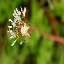

In [23]:
img

In [24]:
x=image.img_to_array(img)

In [25]:
x

array([[[ 73., 115.,   3.],
        [ 75., 120.,   3.],
        [ 74., 119.,   0.],
        ...,
        [118., 142.,  44.],
        [135., 158.,  54.],
        [136., 162.,  53.]],

       [[ 75., 117.,   5.],
        [ 78., 121.,   5.],
        [ 82., 123.,   3.],
        ...,
        [118., 141.,  35.],
        [132., 156.,  44.],
        [134., 161.,  44.]],

       [[ 80., 119.,  10.],
        [ 86., 124.,  13.],
        [ 88., 127.,  12.],
        ...,
        [119., 145.,  35.],
        [130., 154.,  40.],
        [133., 163.,  41.]],

       ...,

       [[117., 120.,  33.],
        [113., 134.,  31.],
        [114., 142.,  31.],
        ...,
        [114., 134.,  45.],
        [109., 135.,  38.],
        [ 98., 130.,  21.]],

       [[118., 125.,  32.],
        [113., 134.,  29.],
        [113., 142.,  32.],
        ...,
        [113., 136.,  48.],
        [106., 134.,  34.],
        [ 98., 131.,  18.]],

       [[117., 135.,  35.],
        [109., 136.,  23.],
        [118., 1

In [26]:
x=np.expand_dims(x,axis=0)
x

array([[[[ 73., 115.,   3.],
         [ 75., 120.,   3.],
         [ 74., 119.,   0.],
         ...,
         [118., 142.,  44.],
         [135., 158.,  54.],
         [136., 162.,  53.]],

        [[ 75., 117.,   5.],
         [ 78., 121.,   5.],
         [ 82., 123.,   3.],
         ...,
         [118., 141.,  35.],
         [132., 156.,  44.],
         [134., 161.,  44.]],

        [[ 80., 119.,  10.],
         [ 86., 124.,  13.],
         [ 88., 127.,  12.],
         ...,
         [119., 145.,  35.],
         [130., 154.,  40.],
         [133., 163.,  41.]],

        ...,

        [[117., 120.,  33.],
         [113., 134.,  31.],
         [114., 142.,  31.],
         ...,
         [114., 134.,  45.],
         [109., 135.,  38.],
         [ 98., 130.,  21.]],

        [[118., 125.,  32.],
         [113., 134.,  29.],
         [113., 142.,  32.],
         ...,
         [113., 136.,  48.],
         [106., 134.,  34.],
         [ 98., 131.,  18.]],

        [[117., 135.,  35.],
       

In [27]:
model.predict(x)

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.9213412e-21,
        1.0000000e+00]], dtype=float32)

In [28]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [29]:
op = ['daisy','dandelion','rose','sunflower','tulip']
pred = np.argmax(model.predict(x))
op[pred]

'tulip'

In [30]:
img = image.load_img('/content/drive/MyDrive/Flowers-Dataset/flowers/tulip/10094729603_eeca3f2cb6.jpg',target_size=(64,64))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
pred = np.argmax(model.predict(x))
op[pred]

'tulip'